## SPARQL Proficiency x Number of Visualisations

In [ ]:
import pandas as pd
import json

file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [ ]:
data_viz_counts = []
for story_id, story_content in data.items():
    elements = story_content.get("elements", [])
    num_data_viz = elements.count("data viz")
    data_viz_counts.append({
        "story_id": story_id,
        "num_data_viz": num_data_viz
    })

df_data_viz = pd.DataFrame(data_viz_counts)
df_data_viz.to_csv("outputs/data_viz_num.csv")
print(df_data_viz)


    story_id  num_data_viz
0   D-hp3wDV             6
1   y4Srva15             4
2   7qpfziir             5
3   Nokx0yU6             2
4   gz_gxhYn             7
5   U2OtB3XT             5
6   v4h_GSI0             3
7   1ptR3pru             7
8   JQpdcw-d             9
9   B9SLlUry             5
10  r7i-PG2n             6
11  AUmcnOzL             4
12  tyK82z37            10
13  IRRbkmZk             7
14  Vy4_Rxzv             4
15  M9EZmoBI            11
16  uhDaBOl1             9
17  SXefpzf4             2
18  EzsIH_Et             5
19  16FP4tfG             4
20  sUMoEZI5            13
21  _HnVHPjm             2
22  4D206Lam             8
23  j3ZikN40             6
24  BOGODrvZ             7
25  abkhtH-r             8
26  Huo1mZpJ             8
27  JYOzBt8Y             7
28  buiNjeJj            14
29  PziKYGG_             7
30  wa1_2kB_            10
31  lkuzAhad             9
32  jamFJtUo            10
33  gzeEqkGo             9
34  KzqVF2Z6            13
35  Ww1HhAGH             5
3

## Correlation Number of Data Viz X SPARQL Profiency

In [1]:
import pandas as pd

df_sparql = pd.read_csv('outputs/sparql_proficiency_final.csv', index_col=0)
df_data_viz = pd.read_csv('outputs/data_viz_num.csv', index_col=0)

df_merged = pd.merge(df_data_viz, df_sparql[['story_id', 'sparql_proficiency']], on='story_id', how='inner')

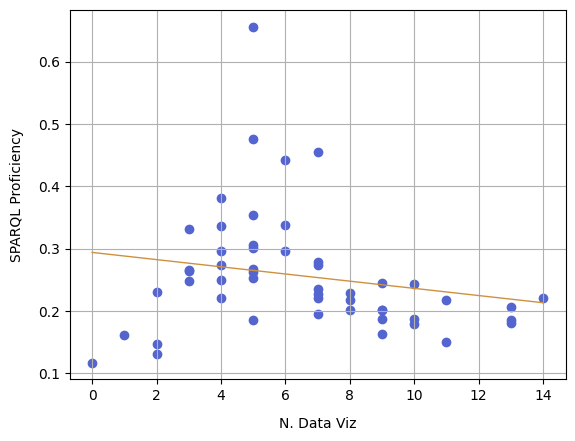

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

color_palette = ['#5565cf', '#b14ecf', '#cf4773', '#cf913f', '#87cf38', '#30cf6b', '#29a1cf', '#2138cf']
 
x = np.array(df_merged['num_data_viz'])
y = np.array(df_merged['sparql_proficiency'])
 
# Compute best-fit line (linear regression)
m, b = np.polyfit(x, y, 1)  # 1st-degree polynomial (y = mx + b)
 
# Create scatter plot
plt.scatter(x, y, color=color_palette[0], label="Data points")
 
# Plot best-fit line
x_sorted = np.sort(x)
plt.plot(x_sorted, m*x_sorted + b, color=color_palette[3], linewidth=1, label="Best-fit line")
 
# Labels and title
plt.xlabel("N. Data Viz", labelpad=10)
plt.ylabel("SPARQL Proficiency", labelpad=10)
plt.grid(True)
# Save as JPG with 300 dpi and EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/17.jpg", dpi=300, bbox_inches="tight", format="jpg")
# plt.savefig("outputs/img/17.eps", format="eps", bbox_inches="tight")
plt.show()

In [5]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation (measures linear relationship)
pearson_corr, pearson_p = pearsonr(x, y)

# Spearman correlation (measures monotonic relationship, rank-based)
spearman_corr, spearman_p = spearmanr(x, y)

# Print results
print(f"Pearson correlation: {pearson_corr:.3f} (p-value: {pearson_p:.3f})")
print(f"Spearman correlation: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

Pearson correlation: -0.196 (p-value: 0.168)
Spearman correlation: -0.277 (p-value: 0.049)
